# Welcome

In [211]:
import pandas as pd
import matplotlib as mp
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

In [213]:
df=pd.read_csv("online_shoppers_intention.csv")

### Meaning of each variable in this table:
 1. **Administrative:** Amount of pages of type administrative the visitor saw during their visit, for example: shipping info, policies, terms, and help (like FAQs)
 2. **Administrative_Duration:** Total time doing administrative activities
 3. **Informational** Amount of pages of type informational, for example: services, the company itself, or any other content not directly related to purchasing or account management.
 4. **Informational_Duration:** Total time doing Informational activities
 5. **ProductRelated:** Amount of pages clicked on products
 6. **ProductRelated_Time:** Total of time in seconds on doing ProductRelated activities
 7. **BounceRates:** Porcentage of visitors that entered the page and left without interacting with the website 
 8. **ExitRates:** It's the percentage of all visits to that page that were the last page viewed in the user's session.
 9. **PageValue:** It's the average value for a webpage that a user visited before completing an e-commerce transaction.
 10. **SpecialDay:**  It indicates the temporal proximity of the visit to a specific holiday or special day 
 11. **Month:** Month of the year where the visit occured
 12. **Operatiing system:** Categorical variables describing the visitor's operating system
 13. **Browser:**
 14. **Region:**
 15. **TrafficType:** Tells us how the visitor arrived at the website. 
 16. **visitorType:** Type of visitor, it can be, Returning visitor, new visitor or other
 17. **Weekend:** Boolean Variable that indicates if the visit was in the weekend
 18. **Revenue:** indicates whether a user's session on the e-commerce website ended in a transaction (purchase) or not.

**looking at the information below, you can see that are variables have the right Type of data and the table doesn't contain any missing values**

In [215]:
print(df.info())
print("\nMissing values:\n\n",df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

As you can see below, the months with the highest Revenue are **November** and **May**, which is likely due to holidays.

**Data visualization is made by Tableau**


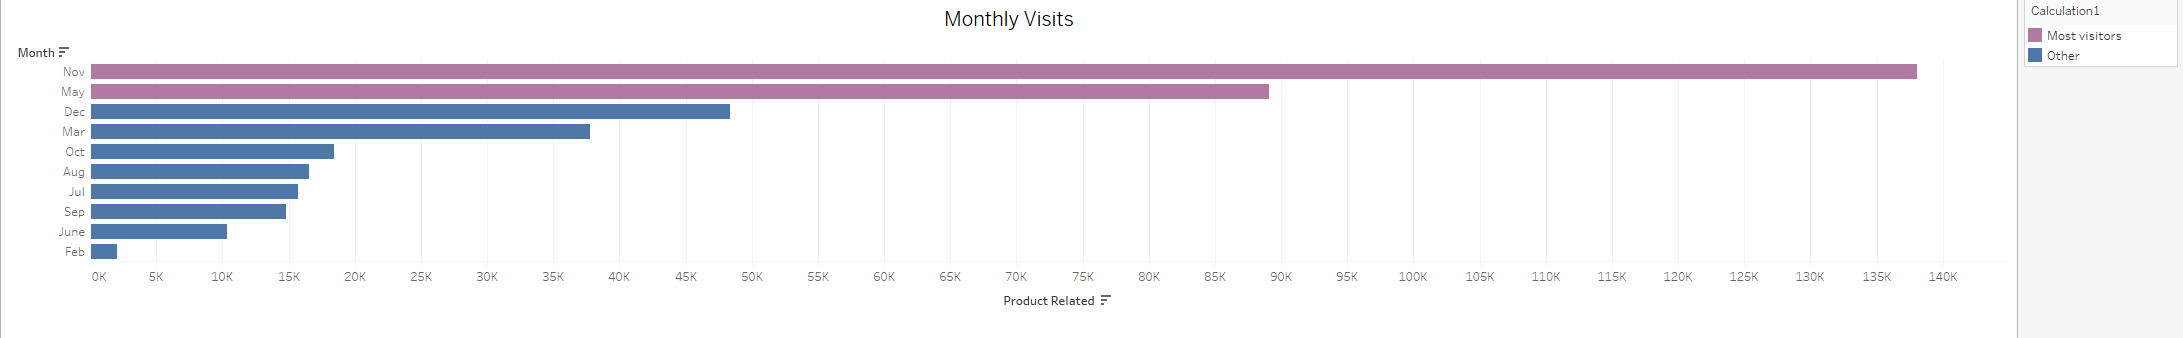

In [217]:
image_path="Monthly_Visits.png"
display(Image(filename=image_path))

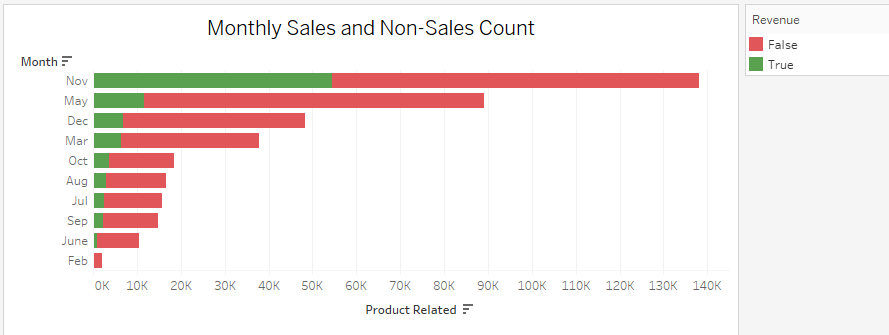

In [180]:
image_path="C:/Users/Eric/Desktop/Project_Solo_Data_Science/Shopping/Monthly_Sales_and_Non-Sales_Count.png"
display(Image(filename=image_path))

### This graph is very important because it tells you what kind of costumers purcheses from the website

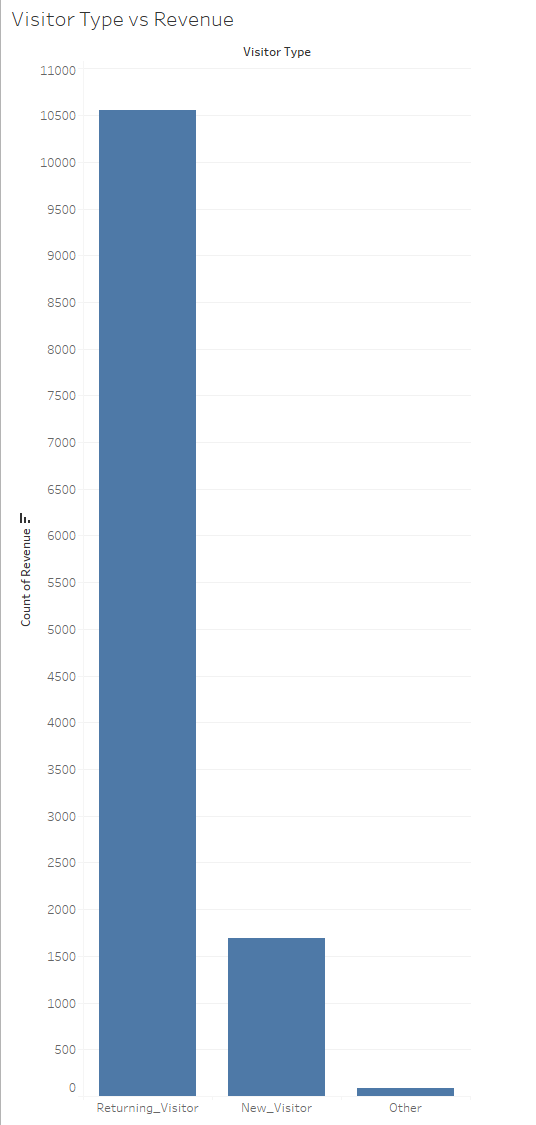

In [192]:
image_path="Visitor Type vs Revenue.png"
display(Image(filename=image_path))

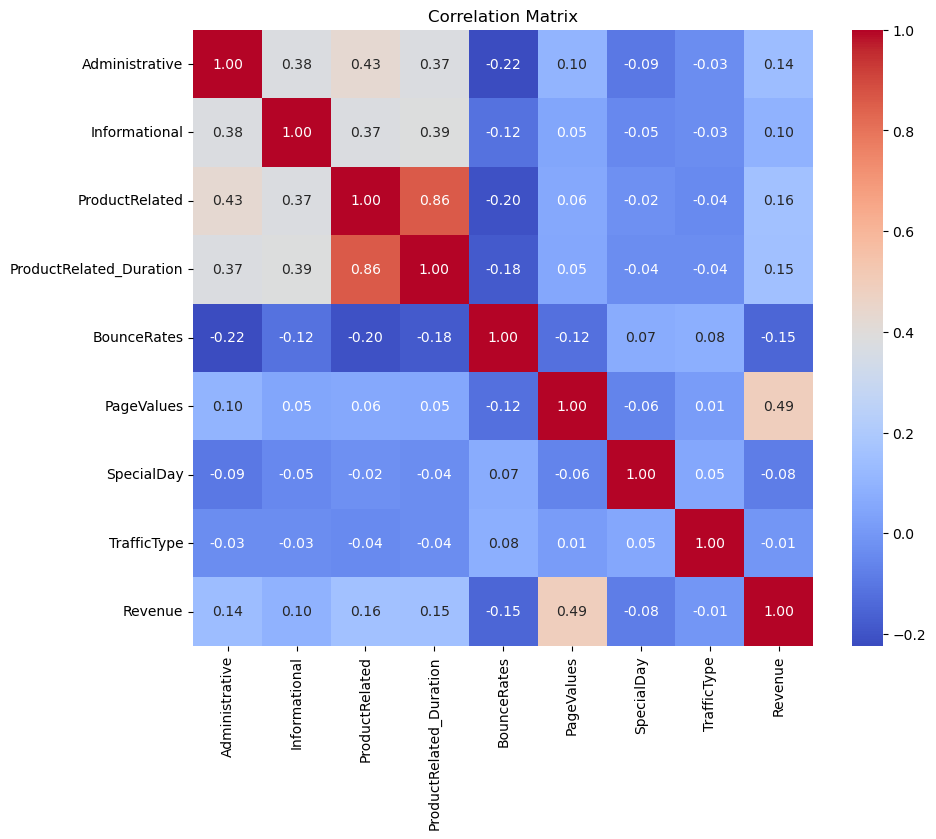

In [219]:
corr_test=df[["Administrative","Informational","ProductRelated","ProductRelated_Duration","BounceRates","PageValues","SpecialDay","TrafficType","Revenue"]]
correlation_matrix = corr_test.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Considering the graphs and the correlation matrix, the most impactful variables to consider in the models are: **PageValues, months, VisitorType, Administrative, Informational, ProductRelated,BounceRates**

## Modeling Time!

In [221]:

# Aplicar One-Hot Encoding a la columna 'VisitorType'
df = pd.get_dummies(df, columns=['VisitorType'], prefix='VisitorType', drop_first=False)

# Aplicar One-Hot Encoding a la columna 'Month'
df = pd.get_dummies(df, columns=['Month'], prefix='Month', drop_first=False)

In [223]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep'],
      dtype='object')

convert the boolean to int, for it can be used it in the model

In [225]:

list_of_bool=["Weekend","VisitorType_New_Visitor","VisitorType_Other","VisitorType_Returning_Visitor","Month_Aug","Month_Dec","Month_Feb","Month_Jul","Month_June","Month_Mar","Month_May","Month_Nov","Month_Oct","Month_Sep"]
df[list_of_bool]=df[list_of_bool].astype(int)

selecting my dependent and independent variables

In [291]:
X=df[["Weekend","Revenue","VisitorType_New_Visitor","VisitorType_Other","VisitorType_Returning_Visitor","Month_Aug","Month_Dec","Month_Feb","Month_Jul","Month_June","Month_Mar","Month_May","Month_Nov","Month_Oct","Month_Sep","PageValues","Administrative","Informational","ProductRelated","BounceRates"]]
#X=df.drop('Revenue', axis=1)
y = df["Revenue"]

In [283]:
# 1. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [285]:
# 2. Scale the numerical features
scaler = StandardScaler()
numerical_cols = ["PageValues", "Administrative", "Informational", "ProductRelated", "BounceRates"]
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [287]:
# 4. Train a Logistic Regression model with the noisy data
model = LogisticRegression(random_state=42, solver='liblinear',class_weight="balanced")
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

Accuracy of the model with noise in training (no noise in testing): 0.8627

Classification Report (with noise in training):
              precision    recall  f1-score   support

       False       0.95      0.88      0.92      3127
        True       0.54      0.74      0.63       572

    accuracy                           0.86      3699
   macro avg       0.75      0.81      0.77      3699
weighted avg       0.89      0.86      0.87      3699



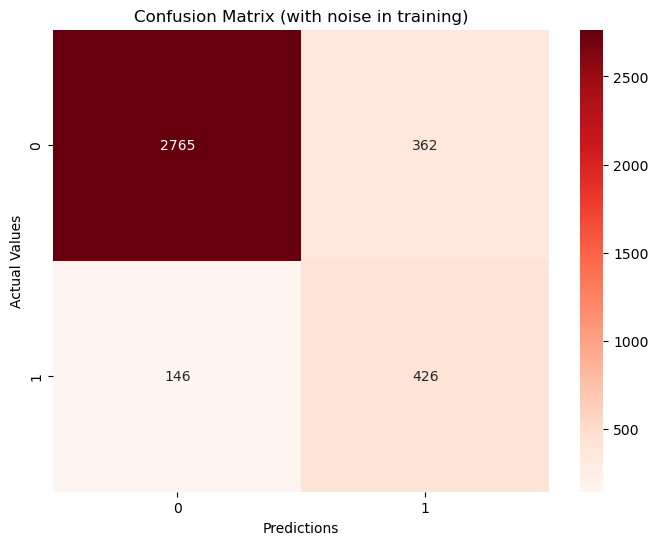

In [289]:
# 5. Evaluate the model on the test set (WITHOUT noise)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model with noise in training (no noise in testing): {accuracy:.4f}")

print("\nClassification Report (with noise in training):")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix (with noise in training)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix (with noise in training)')
plt.show()

In [295]:
revenue_counts = df['Revenue'].value_counts()
print(revenue_counts)

Revenue
False    10422
True      1908
Name: count, dtype: int64


Predicting online purchases faces a class imbalance with far fewer 'Purchase' than 'No Purchase' sessions, hindering accurate prediction of the crucial minority class. Techniques to address this imbalance are necessary for effective modeling.
While Logistic Regression was tried, tree-based models like Random Forests are often favored due to their ability to handle complex data and their resistance to overfitting, a concern where models learn training data too well and generalize poorly. Random Forests tend to offer better real-world performance.